# <center>Titanic Survived Prediction</center>
___


### Data Dictionary
| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# 0 - Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# 1 - Import data

In [17]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


# 3 - Exploratory Analysis

## Filter by survivors

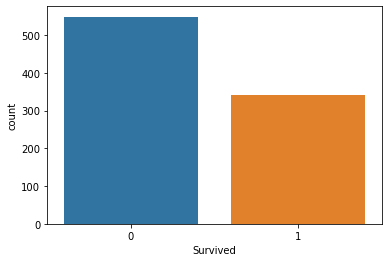

In [ ]:
sns.countplot(x='Survived', data = df_train)

In [ ]:
df_test["Survived"] = 0
df_test.loc[:, ['PassengerId', 'Survived']].to_csv('Submissions/no_survived.csv', index = False)

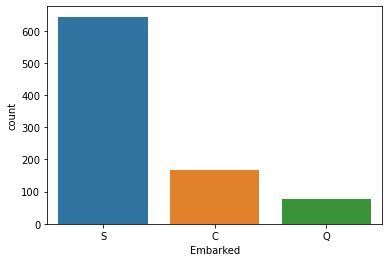

In [ ]:
sns.countplot(x='Embarked', data = df_train)

## Filter by sex  == female

c:\users\victo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


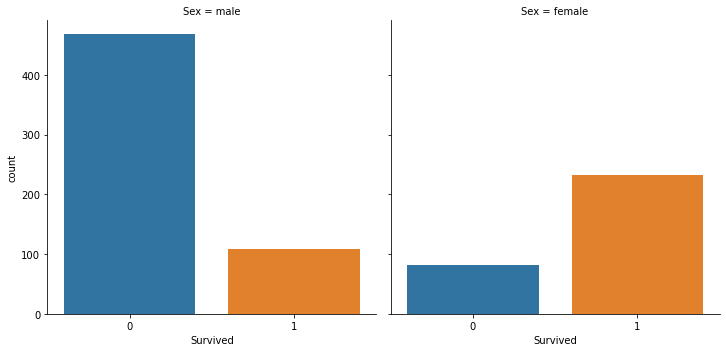

In [ ]:
sns.factorplot(x='Survived', col='Sex', kind='count', data = df_train)

In [ ]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [ ]:
df_test['Survived'] = df_test.Sex == 'female'
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))

df_test.loc[:, ['PassengerId', 'Survived']].to_csv('Submissions/woman_survived.csv', index = False)

## Filter by Pclass == 1

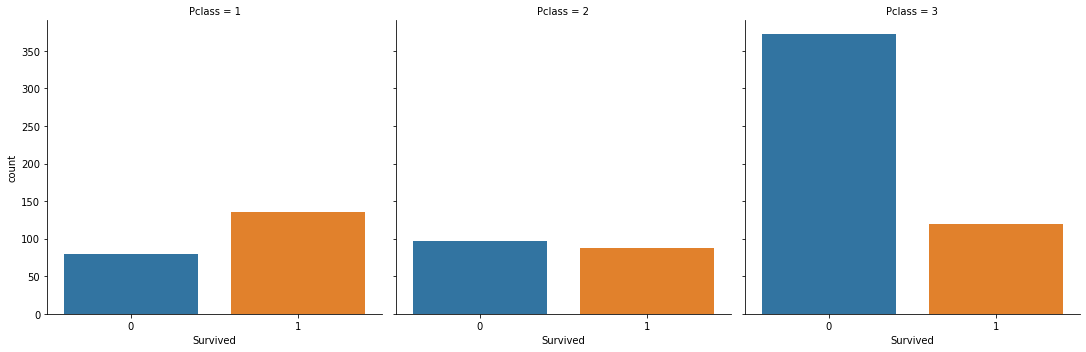

In [ ]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data = df_train)

In [ ]:
df_test['Survived'] = df_test.Pclass == 1
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))

df_test.loc[:, ['PassengerId', 'Survived']].to_csv('Submissions/class_survived.csv', index = False)

## Filter by Embarked == C

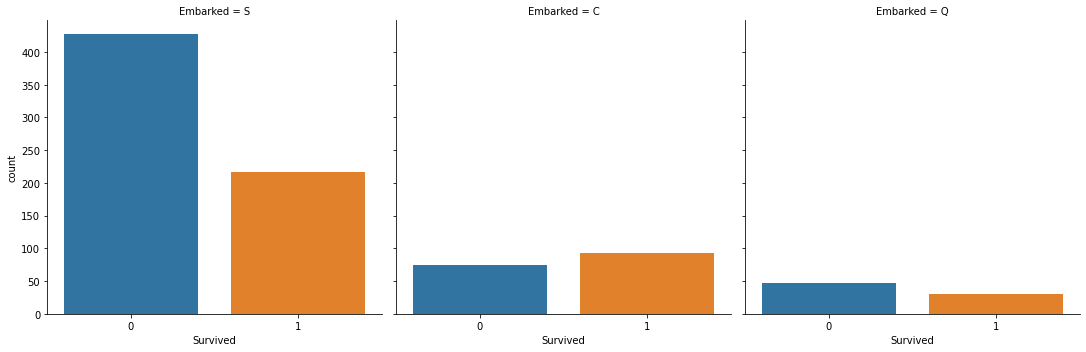

In [ ]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data = df_train)

In [ ]:
df_test['Survived'] = df_test.Embarked == "C"
df_test['Survived'] = df_test.Survived.apply(lambda x: int(x))

df_test.loc[:, ['PassengerId', 'Survived']].to_csv('Submissions/french_survived.csv', index = False)

## Filter by Sex = female & Pclass = 1

In [ ]:
df_women = df_train[df_train.Sex == 'female']
df_men = df_train[df_train.Sex == 'male']
df_women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


c:\users\victo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


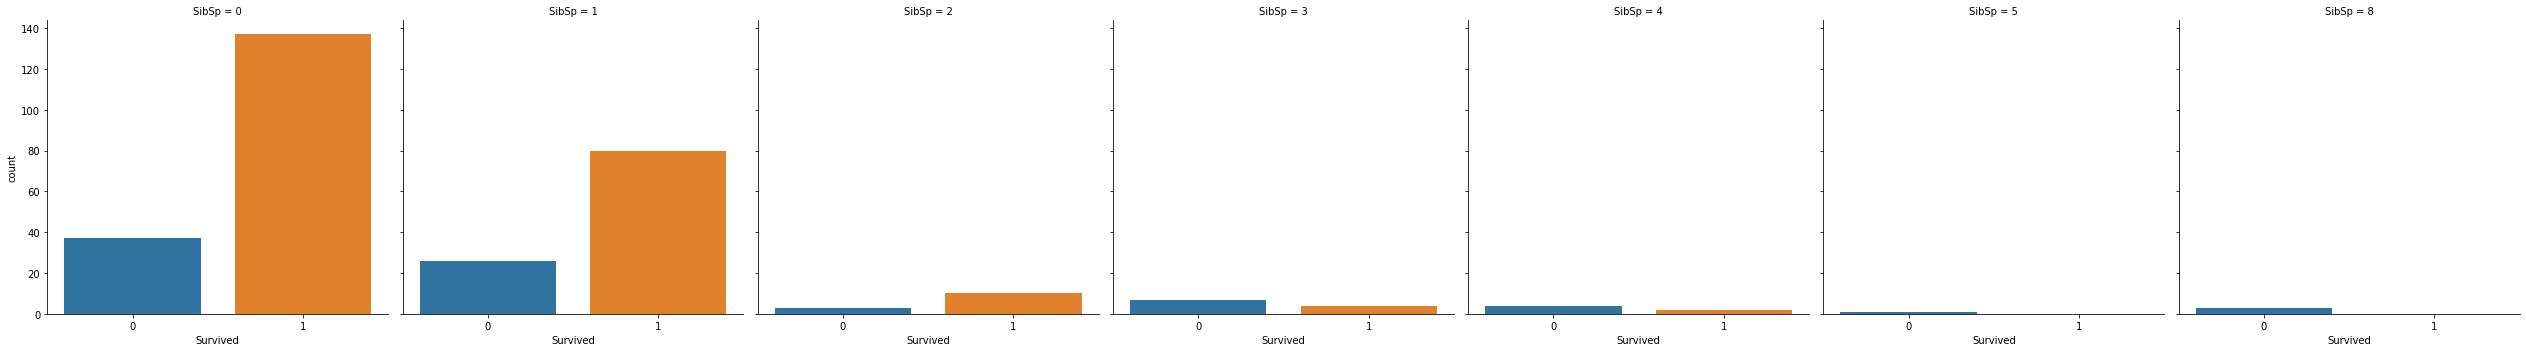

In [ ]:
sns.factorplot(x="Survived", col="SibSp", kind="count", data = df_women)

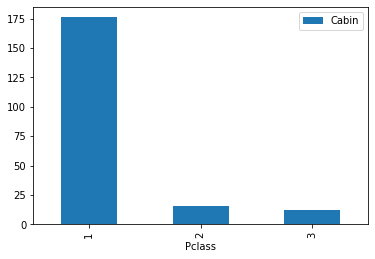

In [ ]:
df_train.groupby('Pclass').count()[['Cabin']].plot.bar()

# Feature Engineering

## Title

In [ ]:
import string

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in str(big_string):
            return substring
    return np.nan

In [ ]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

df_train['Title'] = df_train['Name'].map(lambda x: substrings_in_string(x, title_list))
df_test['Title'] = df_test['Name'].map(lambda x: substrings_in_string(x, title_list))

In [ ]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

    
df_train['Title'] = df_train.apply(replace_titles, axis=1)
df_test['Title'] = df_test.apply(replace_titles, axis=1)
df_train.drop(columns='Name', inplace=True)
df_test.drop(columns='Name', inplace=True)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Deck

In [ ]:
df_train['Cabin'].value_counts().head()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: Cabin, dtype: int64

In [ ]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df_train['Deck'] = df_train['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
df_test['Deck'] = df_test['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN


## Family size

In [76]:
#Creating new family_size column
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch']
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Embarked_C,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,1,0,0,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,1,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,1,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,0,1,0


In [77]:
df_train[['Survived', 'SibSp', 'Parch', 'Family_Size']].corr()

,Survived,SibSp,Parch,Family_Size
Survived,1.000000,-0.035322,0.081629,0.016639
SibSp,-0.035322,1.000000,0.414838,0.890712
Parch,0.081629,0.414838,1.000000,0.783111
Family_Size,0.016639,0.890712,0.783111,1.000000


## Age*Class

In [97]:
df_train['Age*Class'] = df_train['Age'] * df_train['Pclass']
df_test['Age*Class'] = df_test['Age'] * df_test['Pclass']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr,Family_Size,Fare_Per_Person,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,0,0,1,1,3.62500,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,0,1,1,35.64165,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,0,7.92500,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,0,1,1,26.55000,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,0,0,0,1,0,8.05000,105.0


In [98]:
df_train[['Survived', 'Age', 'Pclass', 'Age*Class']].corr()

,Survived,Age,Pclass,Age*Class
Survived,1.000000,-0.077221,-0.338481,-0.338900
Age,-0.077221,1.000000,-0.369226,0.601746
Pclass,-0.338481,-0.369226,1.000000,0.447533
Age*Class,-0.338900,0.601746,0.447533,1.000000


## Fare per person

In [87]:
df_train['Fare_Per_Person'] = df_train['Fare'] / (df_train['Family_Size'] + 1)
df_test['Fare_Per_Person'] = df_test['Fare'] / (df_test['Family_Size'] + 1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_C,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr,Family_Size,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,0,1,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,0,0,1,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,0,0,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,0,1,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,0,0,0,1,0,8.05000


In [ ]:
df_train[['Survived', 'Fare', 'Family_Size', 'Fare_Per_Person']].corr()

,Survived,Fare,Family_Size,Fare_Per_Person
Survived,1.000000,0.257307,0.016639,0.221600
Fare,0.257307,1.000000,0.217138,0.840995
Family_Size,0.016639,0.217138,1.000000,-0.099173
Fare_Per_Person,0.221600,0.840995,-0.099173,1.000000


## Gender (Factorize)

In [ ]:
label_train, genders = pd.factorize(df_train['Sex'], sort=True)
label_test, genders = pd.factorize(df_test['Sex'], sort=True)
print(genders)
df_train['Sex'] = label_train
df_test['Sex'] = label_test
df_train.head()

Index(['female', 'male'], dtype='object')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN,1,66.0,3.62500
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1,38.0,35.64165
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN,0,78.0,7.92500
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1,35.0,26.55000
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN,0,105.0,8.05000


## Embarked (Factorize)

In [ ]:
label_train, ports = pd.factorize(df_train['Embarked'], sort=True)
label_test, ports = pd.factorize(df_test['Embarked'], sort=True)
print(ports)
df_train['Embarked'] = label_train
df_test['Embarked'] = label_test
df_train.head()

Index(['C', 'Q', 'S'], dtype='object')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,NaN,1,66.0,3.62500
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,C,1,38.0,35.64165
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,NaN,0,78.0,7.92500
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,Mrs,C,1,35.0,26.55000
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,2,Mr,NaN,0,105.0,8.05000


## Title (Factorize)

In [ ]:
label_train, titles = pd.factorize(df_train['Title'], sort=True)
label_test, titles = pd.factorize(df_test['Title'], sort=True)
print(titles)
df_train['Title'] = label_train
df_test['Title'] = label_test
df_train.head()

Index(['Master', 'Miss', 'Mr', 'Mrs'], dtype='object')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,NaN,1,66.0,3.62500
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,3,C,1,38.0,35.64165
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,NaN,0,78.0,7.92500
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,3,C,1,35.0,26.55000
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,2,2,NaN,0,105.0,8.05000


## Deck (Factorize)

In [ ]:
label_train, decks = pd.factorize(df_train['Deck'], sort=True)
label_test, decks = pd.factorize(df_test['Deck'], sort=True)
print(decks)
df_train['Deck'] = label_train
df_test['Deck'] = label_test
df_train.head()

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,-1,1,66.0,3.62500
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,3,2,1,38.0,35.64165
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,-1,0,78.0,7.92500
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,3,2,1,35.0,26.55000
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,2,2,-1,0,105.0,8.05000


## Drop columns

In [ ]:
df_train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,1,22.0,1,0,7.2500,2,2,-1,1,66.0,3.62500
1,2,1,1,0,38.0,1,0,71.2833,0,3,2,1,38.0,35.64165
2,3,1,3,0,26.0,0,0,7.9250,2,1,-1,0,78.0,7.92500
3,4,1,1,0,35.0,1,0,53.1000,2,3,2,1,35.0,26.55000
4,5,0,3,1,35.0,0,0,8.0500,2,2,-1,0,105.0,8.05000


In [ ]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,892,3,1,34.5,0,0,7.8292,1,2,-1,0,103.5,7.829200
1,893,3,0,47.0,1,0,7.0000,2,3,-1,1,141.0,3.500000
2,894,2,1,62.0,0,0,9.6875,1,2,-1,0,124.0,9.687500
3,895,3,1,27.0,0,0,8.6625,2,2,-1,0,81.0,8.662500
4,896,3,0,22.0,1,1,12.2875,2,3,-1,2,66.0,4.095833


## New features

In [18]:
def transform_sex(value):
    if value == 'female':
        return 1
    return 0

In [19]:
train['Sex_binary'] = train['Sex'].map(transform_sex)

train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains('Miss.').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains('Mrs.').astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains('Master').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains('Col').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains('Major').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains('Mr.').astype(int)

In [20]:
test['Sex_binary'] = test['Sex'].map(transform_sex)

test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)

test['Cabine_nula'] = test['Cabin'].isnull().astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains('Miss.').astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains('Mrs.').astype(int)

test['Nome_contem_Master'] = test['Name'].str.contains('Master').astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains('Col').astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains('Major').astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains('Mr.').astype(int)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_binary,Embarked_S,Embarked_C,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,1,0,0,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,1,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,1,0,0,0,0,0,1


In [118]:
features = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula',
           'Nome_contem_Miss', 'Nome_contem_Mrs', 
           'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

X = train[features].fillna(-1)
y = train['Survived']

In [100]:
X.head()

,Sex_binary,Age,Pclass,SibSp,Parch,Fare,Embarked_S,Embarked_C,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr,Family_Size,Fare_Per_Person,Age*Class
0,0,22.0,3,1,0,7.2500,1,0,1,0,0,0,0,0,1,1,3.62500,66.0
1,1,38.0,1,1,0,71.2833,0,1,0,0,1,0,0,0,1,1,35.64165,38.0
2,1,26.0,3,0,0,7.9250,1,0,1,1,0,0,0,0,0,0,7.92500,78.0
3,1,35.0,1,1,0,53.1000,1,0,0,0,1,0,0,0,1,1,26.55000,35.0
4,0,35.0,3,0,0,8.0500,1,0,1,0,0,0,0,0,1,0,8.05000,105.0


# Modeling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [25]:
# baseline (woman)
p = (X['Sex_binary'] == 1).astype(np.int64)
np.mean(y == p)

0.7867564534231201

In [122]:
def report_model(model, X, y, seed=2022):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print("Acurácia no dataset de treino: {:.3f}".format(model.score(X_train, y_train)))
    print("Acurácia no dataset de validação: {:.3f}".format(model.score(X_val, y_val)))
    print("Área sob a curva ROC: {:.3f}".format(roc_auc_score(y_val, y_pred)))

In [124]:
tree_model = DecisionTreeClassifier(max_depth=4)
report_model(tree_model, X, y)

Acurácia no dataset de treino: 0.865
Acurácia no dataset de validação: 0.807
Área sob a curva ROC: 0.770


In [125]:
logr_model = LogisticRegression(solver='liblinear', C=1)
report_model(logr_model, X, y)

Acurácia no dataset de treino: 0.847
Acurácia no dataset de validação: 0.823
Área sob a curva ROC: 0.806


In [126]:
gnnb_model = GaussianNB()
report_model(gnnb_model, X, y)

Acurácia no dataset de treino: 0.796
Acurácia no dataset de validação: 0.796
Área sob a curva ROC: 0.796


In [127]:
ranf_model = RandomForestClassifier(n_estimators=100, n_jobs=1)
report_model(ranf_model, X, y)

Acurácia no dataset de treino: 0.998
Acurácia no dataset de validação: 0.785
Área sob a curva ROC: 0.762


In [128]:
xgbt_model = XGBClassifier(colsample_bylevel=0.9,
                    colsample_bytree=0.8, 
                    gamma=0.99,
                    max_depth=4,
                    min_child_weight=1,
                    n_estimators=100,
                    nthread=4,
                    random_state=2,
                    silent=True)
report_model(xgbt_model, X, y)

Acurácia no dataset de treino: 0.939
Acurácia no dataset de validação: 0.791
Área sob a curva ROC: 0.767


## Validação cruzada

In [59]:
from sklearn.model_selection import KFold

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [60]:
def report_val_cross(model, X, y):
    resultados = []
    for rep in range(10):
        print("Iter:", rep)
        kf = KFold(5, shuffle=True, random_state=rep)

        for linhas_treino, linhas_valid in kf.split(X):
            print("Treino:", linhas_treino.shape[0])
            print("Valid:", linhas_valid.shape[0])

            X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
            y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

            model.fit(X_treino, y_treino)

            p = model.predict(X_valid)

            acc = np.mean(y_valid == p)
            resultados.append(acc)
            print("Acc:", acc)
            print()
    return resultados

In [ ]:
tree_predictions = report_val_cross(tree_model, X, y)

In [ ]:
np.mean(tree_predictions)

0.8220136840123032

In [107]:
logr_predictions = report_val_cross(logr_model, X, y)

Iter: 0
Treino: 712
Valid: 179
Acc: 0.8044692737430168

Treino: 713
Valid: 178
Acc: 0.8258426966292135

Treino: 713
Valid: 178
Acc: 0.8089887640449438

Treino: 713
Valid: 178
Acc: 0.848314606741573

Treino: 713
Valid: 178
Acc: 0.8314606741573034

Iter: 1
Treino: 712
Valid: 179
Acc: 0.7877094972067039

Treino: 713
Valid: 178
Acc: 0.7752808988764045

Treino: 713
Valid: 178
Acc: 0.8595505617977528

Treino: 713
Valid: 178
Acc: 0.8595505617977528

Treino: 713
Valid: 178
Acc: 0.8426966292134831

Iter: 2
Treino: 712
Valid: 179
Acc: 0.7988826815642458

Treino: 713
Valid: 178
Acc: 0.848314606741573

Treino: 713
Valid: 178
Acc: 0.8089887640449438

Treino: 713
Valid: 178
Acc: 0.8146067415730337

Treino: 713
Valid: 178
Acc: 0.8202247191011236

Iter: 3
Treino: 712
Valid: 179
Acc: 0.7988826815642458

Treino: 713
Valid: 178
Acc: 0.8089887640449438

Treino: 713
Valid: 178
Acc: 0.8426966292134831

Treino: 713
Valid: 178
Acc: 0.8258426966292135

Treino: 713
Valid: 178
Acc: 0.8707865168539326

Iter: 4
Tr

In [108]:
np.mean(logr_predictions)

0.8250392316866487

In [94]:
gnnb_predictions = report_val_cross(gnnb_model, X, y)

Iter: 0
Treino: 712
Valid: 179
Acc: 0.8324022346368715

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Treino: 713
Valid: 178
Acc: 0.7584269662921348

Treino: 713
Valid: 178
Acc: 0.8202247191011236

Treino: 713
Valid: 178
Acc: 0.8370786516853933

Iter: 1
Treino: 712
Valid: 179
Acc: 0.776536312849162

Treino: 713
Valid: 178
Acc: 0.7528089887640449

Treino: 713
Valid: 178
Acc: 0.7921348314606742

Treino: 713
Valid: 178
Acc: 0.7640449438202247

Treino: 713
Valid: 178
Acc: 0.8426966292134831

Iter: 2
Treino: 712
Valid: 179
Acc: 0.7988826815642458

Treino: 713
Valid: 178
Acc: 0.8370786516853933

Treino: 713
Valid: 178
Acc: 0.8258426966292135

Treino: 713
Valid: 178
Acc: 0.7696629213483146

Treino: 713
Valid: 178
Acc: 0.7808988764044944

Iter: 3
Treino: 712
Valid: 179
Acc: 0.7541899441340782

Treino: 713
Valid: 178
Acc: 0.7247191011235955

Treino: 713
Valid: 178
Acc: 0.8258426966292135

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Treino: 713
Valid: 178
Acc: 0.8595505617977528

Iter: 4
T

In [95]:
np.mean(gnnb_predictions)

0.7939269349067856

In [ ]:
ranf_predictions = report_val_cross(ranf_model, X, y)

Iter: 0
Treino: 712
Valid: 179
Acc: 0.8435754189944135

Treino: 713
Valid: 178
Acc: 0.7921348314606742

Treino: 713
Valid: 178
Acc: 0.8146067415730337

Treino: 713
Valid: 178
Acc: 0.7921348314606742

Treino: 713
Valid: 178
Acc: 0.7808988764044944

Iter: 1
Treino: 712
Valid: 179
Acc: 0.7653631284916201

Treino: 713
Valid: 178
Acc: 0.7696629213483146

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Treino: 713
Valid: 178
Acc: 0.8426966292134831

Treino: 713
Valid: 178
Acc: 0.848314606741573

Iter: 2
Treino: 712
Valid: 179
Acc: 0.8044692737430168

Treino: 713
Valid: 178
Acc: 0.8595505617977528

Treino: 713
Valid: 178
Acc: 0.8033707865168539

Treino: 713
Valid: 178
Acc: 0.7865168539325843

Treino: 713
Valid: 178
Acc: 0.7696629213483146

Iter: 3
Treino: 712
Valid: 179
Acc: 0.7877094972067039

Treino: 713
Valid: 178
Acc: 0.7921348314606742

Treino: 713
Valid: 178
Acc: 0.8258426966292135

Treino: 713
Valid: 178
Acc: 0.8089887640449438

Treino: 713
Valid: 178
Acc: 0.797752808988764

Iter: 4
Tr

In [ ]:
np.mean(ranf_predictions)

0.809099868181533

((array([3., 4., 8., 4., 5., 5., 8., 6., 4., 3.]),
  array([0.76536313, 0.77646727, 0.7875714 , 0.79867554, 0.80977967,
         0.82088381, 0.83198795, 0.84309208, 0.85419622, 0.86530036,
         0.87640449]),
  <a list of 10 Patch objects>),
 (array([ 1.,  1.,  6.,  3., 12.,  3.,  8.,  5.,  5.,  6.]),
  array([0.75280899, 0.76523759, 0.77766619, 0.79009478, 0.80252338,
         0.81495198, 0.82738058, 0.83980918, 0.85223778, 0.86466637,
         0.87709497]),
  <a list of 10 Patch objects>),
 (array([ 1.,  0.,  5.,  2.,  3.,  8.,  6., 13.,  6.,  6.]),
  array([0.66853933, 0.68764045, 0.70674157, 0.7258427 , 0.74494382,
         0.76404494, 0.78314607, 0.80224719, 0.82134831, 0.84044944,
         0.85955056]),
  <a list of 10 Patch objects>),
 (array([ 3.,  3.,  5.,  6.,  4.,  9., 11.,  4.,  3.,  2.]),
  array([0.74157303, 0.75505618, 0.76853933, 0.78202247, 0.79550562,
         0.80898876, 0.82247191, 0.83595506, 0.8494382 , 0.86292135,
         0.87640449]),
  <a list of 10 Patch o

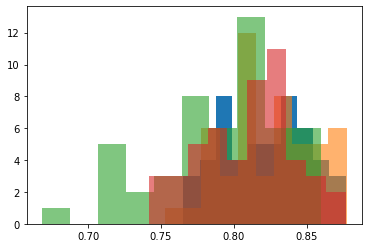

In [ ]:
pylab.hist(tree_predictions), pylab.hist(logr_predictions, alpha=0.6), pylab.hist(gnnb_predictions, alpha=0.6), pylab.hist(ranf_predictions, alpha=0.6)

((array([3., 4., 8., 4., 5., 5., 8., 6., 4., 3.]),
  array([0.76536313, 0.77646727, 0.7875714 , 0.79867554, 0.80977967,
         0.82088381, 0.83198795, 0.84309208, 0.85419622, 0.86530036,
         0.87640449]),
  <a list of 10 Patch objects>),
 (array([ 1.,  1.,  6.,  3., 12.,  3.,  8.,  5.,  5.,  6.]),
  array([0.75280899, 0.76523759, 0.77766619, 0.79009478, 0.80252338,
         0.81495198, 0.82738058, 0.83980918, 0.85223778, 0.86466637,
         0.87709497]),
  <a list of 10 Patch objects>))

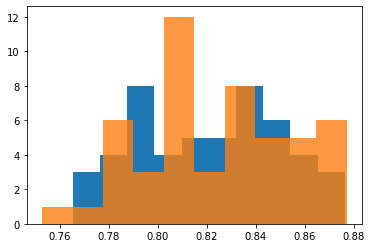

In [ ]:
pylab.hist(tree_predictions), pylab.hist(logr_predictions, alpha=0.8)

# Export

In [56]:
def export_prediction(model, X_train, y_train, X_test, passengerCol, path):
    model.fit(X, y)
    y_pred = model.predict(X_test)
    pred = pd.Series(y_pred, index=passengerCol, name='Survived')
    pred.to_csv(path, header=True)

In [120]:
export_prediction(logr_model, X, y, 
               test[features].fillna(-1), 
               test['PassengerId'], 
               'logregmodel_survived.csv')

In [96]:
export_prediction(gnnb_model, X, y, 
               test[features].fillna(-1), 
               test['PassengerId'], 
               'naivebayes_survived.csv')

# Hyperparameter Tuning

In [ ]:
# Plotar importância das features
# Avalia quão importante é cada variável para as decisões que a árvore fornece
# Corresponde a um número entre 0 e 1 para cada feature, onde 0 significa não usada e 1
# "perfeitamente prevê a resposta". A importância das features sempre somam 1
def plot_feature_importances(model):
    # Listando features
    n_features = X_train.shape[1]
    # Gráfico de barras horizontal a partir da importância de cada features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # Adiciona o ticks, ou traços no eixo Y
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [ ]:
# DECISION TREE MODEL 3 (com GridSearch)

# Definir os possiveis valores para cada hiperparametro para serem explorados
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
          'min_samples_split': [2, 3, 4, 5, 6],
          'min_samples_leaf': [1, 2, 3]}

# Criar objeto com o DecisionTreeClassifier
tree_3 = DecisionTreeClassifier(random_state=seed)

# Criar objeto KFold com StratifiedKFold para validação cruzada
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# Criar um objeto de grade de busca com GridSearchCV, a partir dos parâmetros que definimos
grid_search = GridSearchCV(tree_3, param_grid=params, scoring='roc_auc',
                           cv=skf.split(X_train, y_train))

# Treinar o modelo com o grid search
grid_search.fit(X_train, y_train)

# Printar a melhor combinação de hiperparâmetros
print('Melhores hiperparâmetros:')
print(grid_search.best_params_)

Melhores hiperparâmetros:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}


Acurácia no conjunto de treino: 0.852


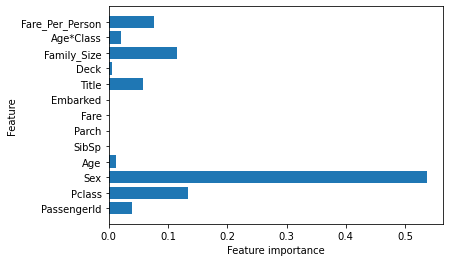

In [ ]:
# Gera uma árvore com as melhores combinações de hiperparâmetros
tree_3 = DecisionTreeClassifier(random_state=seed, max_depth=grid_search.best_params_['max_depth'],
                                min_samples_split=grid_search.best_params_['min_samples_split'],
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# Fita o modelo com o dataset de treino
tree_3.fit(X_train, y_train)

# Usa o modelo para prever o conjunto de validação
y_pred = tree_3.predict(X_test)

# Calcular e printar métricas
print("Acurácia no conjunto de treino: {:.3f}".format(tree_3.score(X_train, y_train)))

# Plotar importância das variáveis
plot_feature_importances(tree_3)

In [ ]:
# LOGISTIC REGRESSIONS MODEL 3 (com GridSearch)

# Generate a range with different values for C parameter
grid = {"C": np.arange(1,150,5)}
logreg_cv = GridSearchCV(LogisticRegression(solver='liblinear'), grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("Melhores hiperparâmetros: ", logreg_cv.best_params_)
print("Acurácia:", logreg_cv.best_score_)

Melhores hiperparâmetros:  {'C': 1}
Acurácia: 0.8046816479400748
